In [349]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display, Math, Latex 
sns.set_theme(style = 'darkgrid')

%matplotlib inline


FEATURE EXTRACTION

DictVectorizer : Converts a dictionary into an array.

In [350]:
data = [{'age' : 1, 'height' : 75},
        {'age' : 5, 'height' : 98.8},
        {'age' : 10, 'height' : 108.5},
        {'age' : 2, 'height' : 96.3}]

In [351]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse = False)
data_transformed = dv.fit_transform(data)
data_transformed

array([[  1. ,  75. ],
       [  5. ,  98.8],
       [ 10. , 108.5],
       [  2. ,  96.3]])

In [352]:
data_transformed.shape

(4, 2)

Data Imputation : Used to fill empty cells

In [353]:
from sklearn.impute import SimpleImputer

Real life dataset loading...

In [354]:
heart_data = pd.read_csv('heart.csv')
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [355]:
heart_data.info() #checking missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [356]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [357]:
heart_data.ca.unique() #can be used to check non numeric missing values

array([2, 0, 1, 3, 4], dtype=int64)

In [358]:
print('# 1 in thal :', heart_data.loc[heart_data.thal == 1, 'thal'].count())

# 1 in thal : 64


In [359]:
heart_data.replace(1, np.nan, inplace = True)

In [360]:
heart_data.isnull().sum()

age           0
sex         713
cp          167
trestbps      0
chol          0
fbs         153
restecg     513
thalach       0
exang       345
oldpeak      51
slope       482
ca          226
thal         64
target      526
dtype: int64

In [361]:
heart_data.ca.unique()

array([ 2.,  0., nan,  3.,  4.])

In [362]:
# SimpleImputer without add_indicator

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(heart_data)
heart_data_imputed = imputer.transform(heart_data)
heart_data_imputed.shape

(1025, 14)

In [363]:
# SimpleImputer with add_indicator. It adds extra columns according to the no. of columns having missing values

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean', add_indicator = True)
imputer = imputer.fit(heart_data)
heart_data_imputed_with_indicator = imputer.transform(heart_data)
heart_data_imputed_with_indicator.shape

(1025, 24)

FEATURE SCALING

In [364]:
cols = ['Sex', 'Length', 'Diameter', ' Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone_data = pd.read_csv('abalone.csv', header = None, names = cols)
abalone_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Step 1 : Examine the dataset

In [365]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3    Height         4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [366]:
abalone_data.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [367]:
abalone_data = abalone_data.replace({'Sex' : {'M':1, 'F':2, 'I': 3}})
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3    Height         4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


Step 2. Separate labels from features

In [368]:
y = abalone_data.pop('Rings')
abalone_data.info() # info after dltng the label column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3    Height         4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


Step 3. Examine feature scales

In [369]:
abalone_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4177.0,1.955470,0.827815,1.0000,1.0000,2.0000,3.000,3.0000
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050


Columnwise graphs

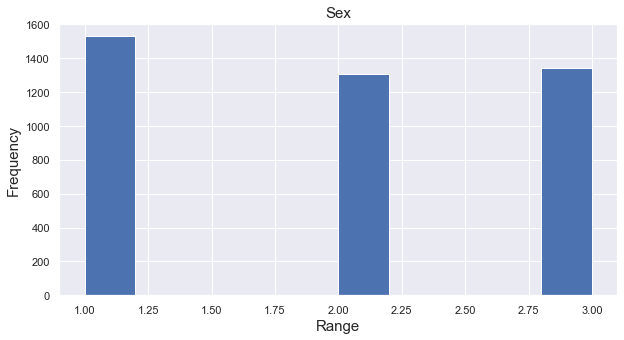

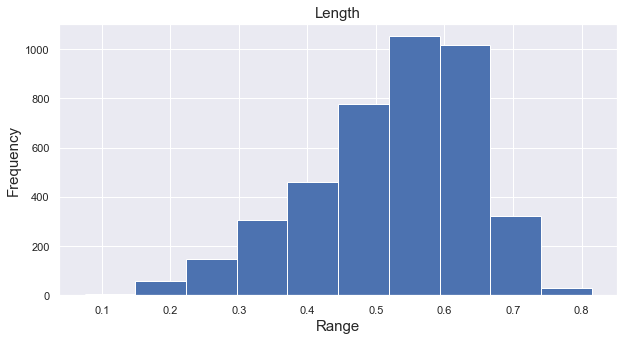

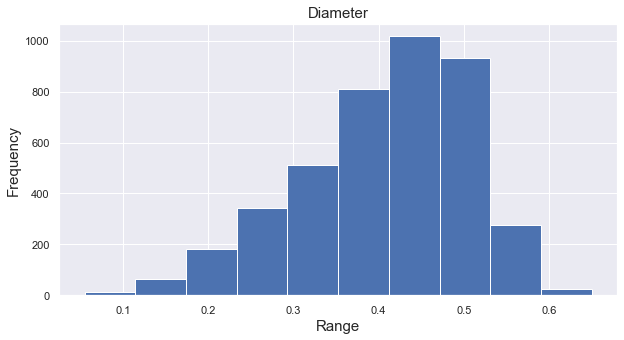

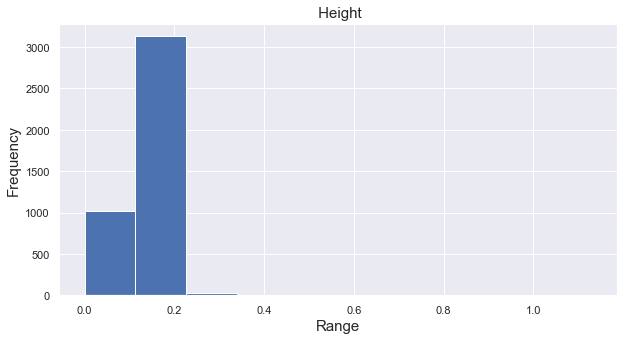

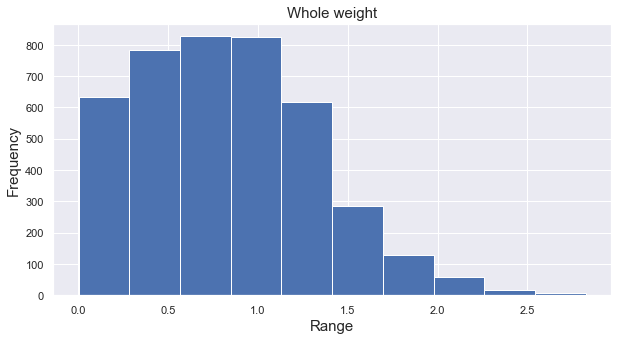

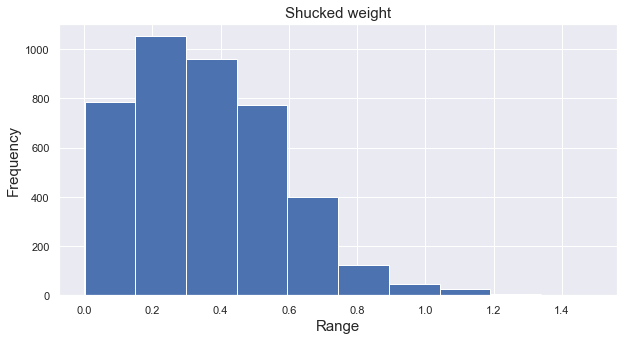

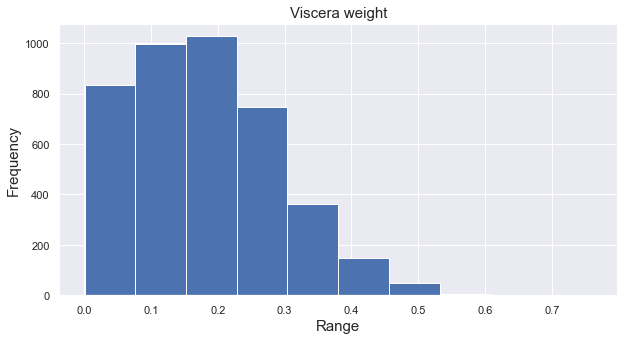

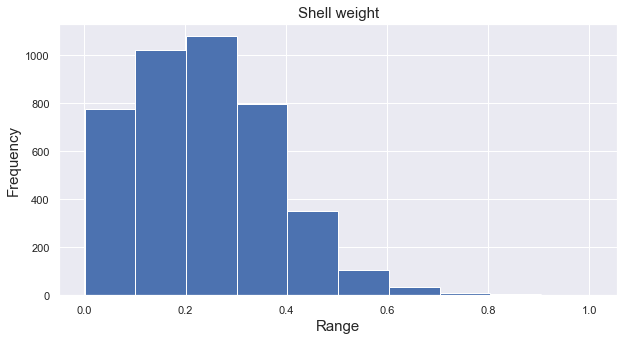

In [370]:
data_copy = abalone_data.copy()

for f in cols[:-1]:
    plt.figure(figsize=(10,5))
    abalone_data[f].plot.hist()
    plt.title(f, fontsize = 15)
    plt.xlabel('Range', fontsize = 15)
    plt.ylabel('Frequency', fontsize = 15)
    plt.show()

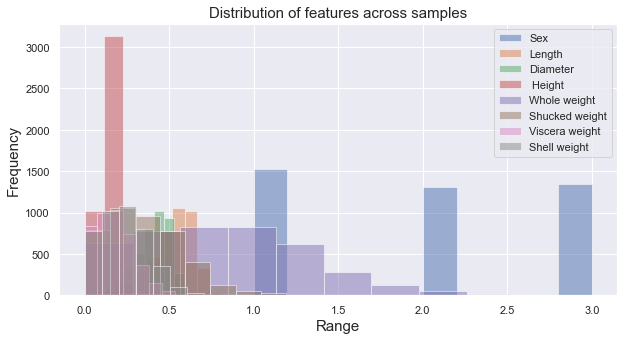

In [371]:
plt.figure(figsize=(10,5))
for f in cols[:-1]:
    plt.hist(abalone_data[f], alpha = 0.5)
plt.title('Distribution of features across samples', fontsize = 15)
plt.legend(cols[:-1])
plt.xlabel('Range', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

plt.show()
    
    

Text(0.5, 1.0, 'KDE plots - combined')

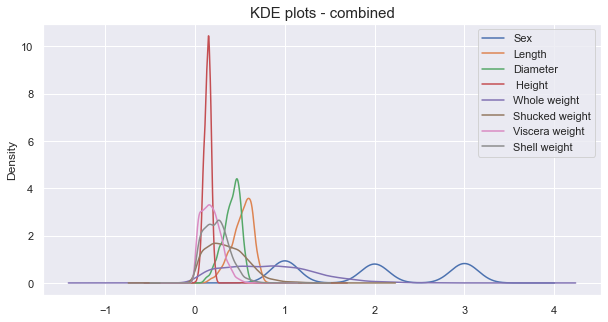

In [372]:
sns.set(rc={'figure.figsize': (10,5)})
abalone_data.plot.kde()
plt.title('KDE plots - combined', fontsize = 15)

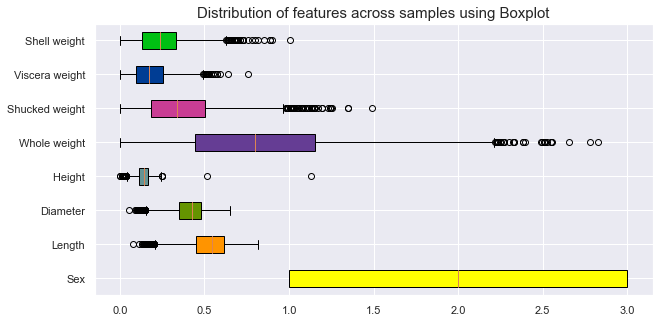

In [373]:
plt.figure(figsize=(10,5))
graph = plt.boxplot(abalone_data, vert=0, patch_artist=True)
plt.yticks([1,2,3,4,5,6,7,8],cols[:-1] )
plt.title('Distribution of features across samples using Boxplot', fontsize = 15)

colors = ['#ffff00','#ff9400','#659400','#659494','#653d94','#c93d94','#003d94','#00c013']
for patch,color in zip(graph['boxes'],colors) :
    patch.set_facecolor(color)



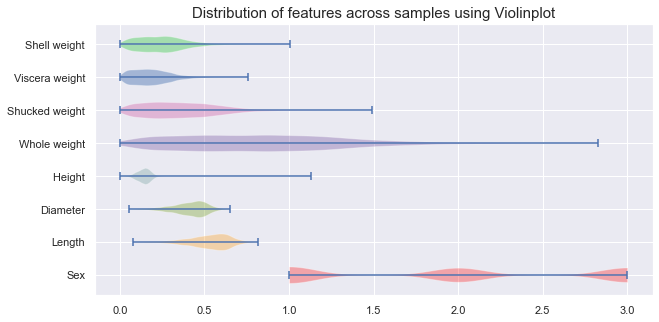

In [374]:
plt.figure(figsize=(10,5))
graph = plt.violinplot(abalone_data, vert=0)
plt.yticks([1,2,3,4,5,6,7,8],cols[:-1] )
plt.title('Distribution of features across samples using Violinplot', fontsize = 15)

colors = ['#ff0000','#ff9400','#659400','#659494','#653d94','#c93d94','#003d94','#00c013']
for patch,color in zip(graph['bodies'],colors) :
    patch.set_facecolor(color)

Step 4: Scaling

........................MaxAbsScaler........................

In [375]:
x = np.array([4,3,10,5,11]).reshape(-1,1)
print(x)

[[ 4]
 [ 3]
 [10]
 [ 5]
 [11]]


In [376]:
from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()
x_new = mas.fit_transform(x)
print(x_new)

[[0.36363636]
 [0.27272727]
 [0.90909091]
 [0.45454545]
 [1.        ]]


........................MinMaxScaler........................

In [377]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
X = abalone_data
X_normalized = mm.fit_transform(X)
X_normalized[:5]

array([[0.        , 0.51351351, 0.5210084 , 0.0840708 , 0.18133522,
        0.15030262, 0.1323239 , 0.14798206],
       [0.        , 0.37162162, 0.35294118, 0.07964602, 0.07915707,
        0.06624075, 0.06319947, 0.06826109],
       [0.5       , 0.61486486, 0.61344538, 0.11946903, 0.23906499,
        0.17182246, 0.18564845, 0.2077728 ],
       [0.        , 0.49324324, 0.5210084 , 0.11061947, 0.18204356,
        0.14425017, 0.14944042, 0.15296462],
       [1.        , 0.34459459, 0.33613445, 0.07079646, 0.07189658,
        0.0595158 , 0.05134957, 0.0533134 ]])

In [378]:
X_normalized.mean(axis = 0)

array([0.47773522, 0.60674608, 0.59307774, 0.12346584, 0.29280756,
       0.24100033, 0.23712127, 0.2365031 ])

In [379]:
X_normalized.std(axis = 0)

array([0.4138578 , 0.16226829, 0.16676972, 0.03701066, 0.17366046,
       0.14925109, 0.14430695, 0.13870055])

In [380]:
X_normalized_df = pd.DataFrame(X_normalized)
X_normalized_df.columns = ['Sex', 'Length', 'Diameter', ' Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

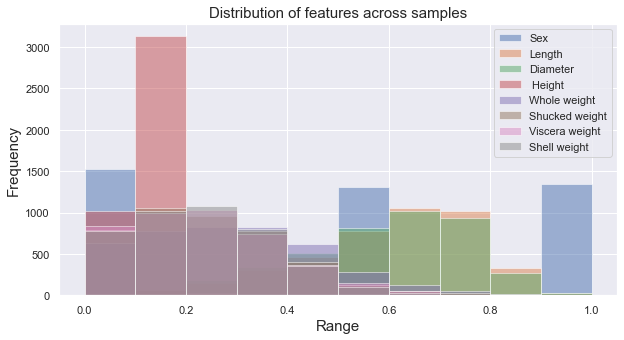

In [381]:
plt.figure(figsize=(10,5))
for f in cols[:-1]:
    plt.hist(X_normalized_df[f], alpha = 0.5)
plt.title('Distribution of features across samples', fontsize = 15)
plt.legend(cols[:-1])
plt.xlabel('Range', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

plt.show()

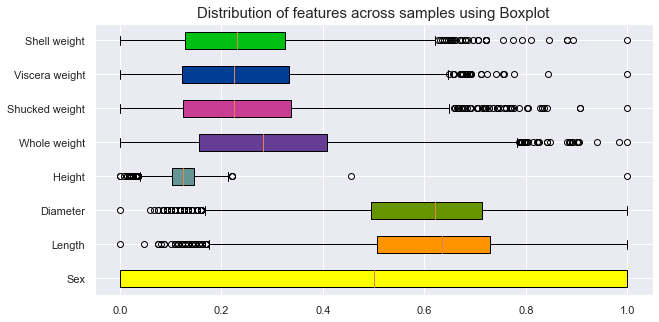

In [382]:
plt.figure(figsize=(10,5))
graph = plt.boxplot(X_normalized_df, vert=0, patch_artist=True)
plt.yticks([1,2,3,4,5,6,7,8],cols[:-1] )
plt.title('Distribution of features across samples using Boxplot', fontsize = 15)

colors = ['#ffff00','#ff9400','#659400','#659494','#653d94','#c93d94','#003d94','#00c013']
for patch,color in zip(graph['boxes'],colors) :
    patch.set_facecolor(color)

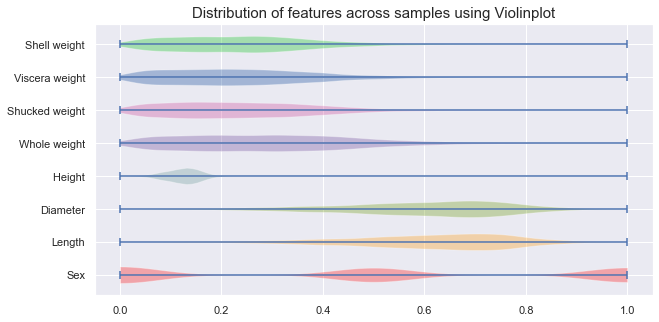

In [383]:
plt.figure(figsize=(10,5))
graph = plt.violinplot(X_normalized_df, vert=0)
plt.yticks([1,2,3,4,5,6,7,8],cols[:-1] )
plt.title('Distribution of features across samples using Violinplot', fontsize = 15)

colors = ['#ff0000','#ff9400','#659400','#659494','#653d94','#c93d94','#003d94','#00c013']
for patch,color in zip(graph['bodies'],colors) :
    patch.set_facecolor(color)

Text(0.5, 1.0, 'KDE plots - combined')

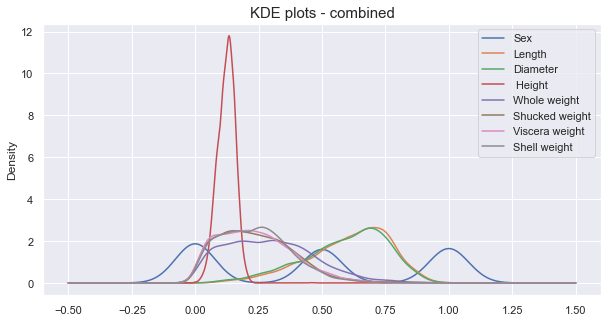

In [384]:
sns.set(rc={'figure.figsize': (10,5)})
X_normalized_df.plot.kde()
plt.title('KDE plots - combined', fontsize = 15)

........................Standardization........................

In [385]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_standarized = ss.fit_transform(X)
X_standarized[:5]

array([[-1.15434629, -0.57455813, -0.43214879, -1.06442415, -0.64189823,
        -0.60768536, -0.72621157, -0.63821689],
       [-1.15434629, -1.44898585, -1.439929  , -1.18397831, -1.23027711,
        -1.17090984, -1.20522124, -1.21298732],
       [ 0.05379815,  0.05003309,  0.12213032, -0.10799087, -0.30946926,
        -0.4634999 , -0.35668983, -0.20713907],
       [-1.15434629, -0.69947638, -0.43214879, -0.34709919, -0.63781934,
        -0.64823753, -0.60759966, -0.60229374],
       [ 1.26194258, -1.61554351, -1.54070702, -1.42308663, -1.27208566,
        -1.2159678 , -1.28733718, -1.32075677]])

In [386]:
X_standarized.mean(axis = 0)

array([-1.19075871e-17, -5.83471770e-16, -3.02792930e-16,  3.91249292e-16,
        9.18585294e-17, -1.02065033e-17,  2.70472337e-16,  2.97689679e-16])

In [387]:
X_standarized.std(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [388]:
X_standarized_df = pd.DataFrame(X_standarized)
X_standarized_df.columns = ['Sex', 'Length', 'Diameter', ' Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

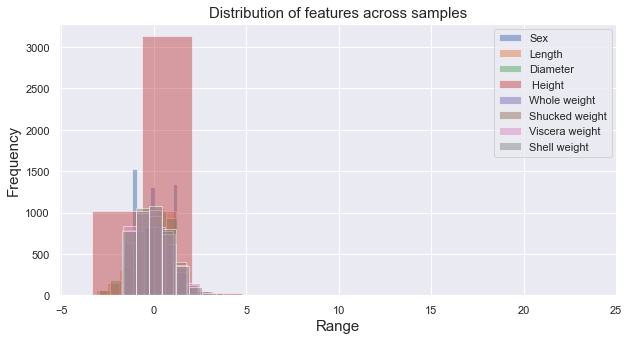

In [389]:
plt.figure(figsize=(10,5))
for f in cols[:-1]:
    plt.hist(X_standarized_df[f], alpha = 0.5)
plt.title('Distribution of features across samples', fontsize = 15)
plt.legend(cols[:-1])
plt.xlabel('Range', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

plt.show()

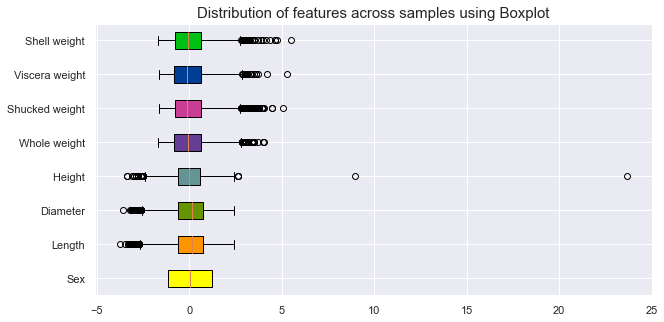

In [390]:
plt.figure(figsize=(10,5))
graph = plt.boxplot(X_standarized_df, vert=0, patch_artist=True)
plt.yticks([1,2,3,4,5,6,7,8],cols[:-1] )
plt.title('Distribution of features across samples using Boxplot', fontsize = 15)

colors = ['#ffff00','#ff9400','#659400','#659494','#653d94','#c93d94','#003d94','#00c013']
for patch,color in zip(graph['boxes'],colors) :
    patch.set_facecolor(color)

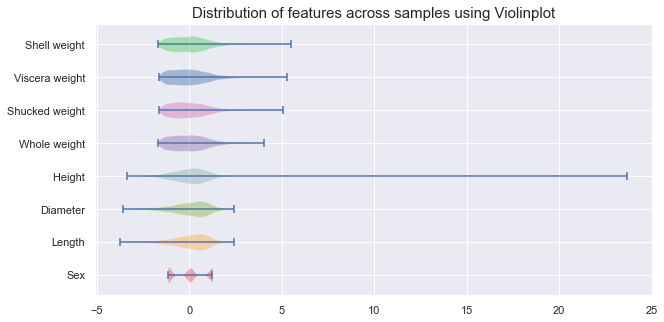

In [391]:
plt.figure(figsize=(10,5))
graph = plt.violinplot(X_standarized_df, vert=0)
plt.yticks([1,2,3,4,5,6,7,8],cols[:-1] )
plt.title('Distribution of features across samples using Violinplot', fontsize = 15)

colors = ['#ff0000','#ff9400','#659400','#659494','#653d94','#c93d94','#003d94','#00c013']
for patch,color in zip(graph['bodies'],colors) :
    patch.set_facecolor(color)

Text(0.5, 1.0, 'KDE plots')

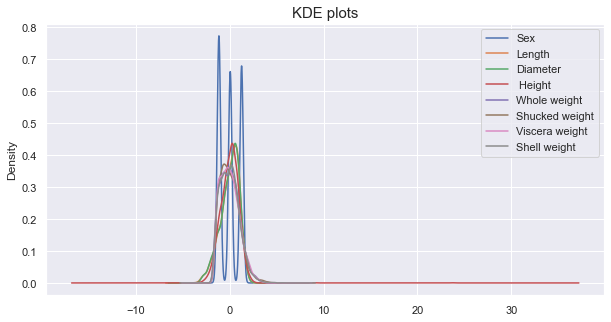

In [392]:
sns.set(rc={'figure.figsize': (10,5)})
X_standarized_df.plot.kde()
plt.title('KDE plots', fontsize = 15)

Step 4. add_dummy_feature

In [393]:
x = np.array([[2,3],[4,1],[7,9]])

from sklearn.preprocessing import add_dummy_feature

x_dummy_added = add_dummy_feature(x)
x_dummy_added

array([[1., 2., 3.],
       [1., 4., 1.],
       [1., 7., 9.]])

Step 5. Custom Transformers

In [394]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.datasets import load_wine

In [395]:
data = load_wine()
wine_data = pd.DataFrame(data = data.data)
print(wine_data.shape)
wine_data.describe().T

(178, 13)


,count,mean,std,min,25%,50%,75%,max
0,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
1,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
2,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
3,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
4,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
5,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
6,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
7,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
8,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
9,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [396]:
transformer = FunctionTransformer(np.log1p, validate =  True) #np.log1p returns natural logarithm of (1 + feature value)
wine_data_transformer = transformer.transform(np.array(wine_data))
pd.DataFrame(wine_data_transformer).describe().T

,count,mean,std,min,25%,50%,75%,max
0,178.0,2.637420,0.058238,2.487404,2.592452,2.642622,2.686316,2.761907
1,178.0,1.154950,0.309582,0.553885,0.956471,1.052567,1.406682,1.916923
2,178.0,1.210498,0.083078,0.858662,1.166271,1.211941,1.269057,1.442202
3,178.0,3.006665,0.166601,2.451005,2.901422,3.020425,3.113515,3.433987
4,178.0,4.603203,0.135300,4.262680,4.488636,4.595120,4.682131,5.093750
5,178.0,1.174000,0.194288,0.683097,1.008869,1.210451,1.335001,1.585145
6,178.0,1.047941,0.359733,0.292670,0.790720,1.142628,1.354543,1.805005
7,178.0,0.304769,0.090194,0.122218,0.239017,0.292670,0.362901,0.506818
8,178.0,0.927749,0.222247,0.343590,0.810930,0.938050,1.081805,1.521699
9,178.0,1.731880,0.373143,0.824175,1.439827,1.738709,1.974081,2.639057


Step 6. Polynomial Features

In [397]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=2) # no. features = (degree + #old features)!/(#old features)!
poly_wine_data = poly.fit_transform(wine_data.copy())
poly_wine_data.shape

(178, 105)

In [398]:
poly.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4',
       'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11',
       'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6',
       'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2',
       'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9',
       'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6',
       'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2',
       'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11',
       'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10',
       'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10',
       'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11',
       'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2',
       'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12',


Step 7. Discretization

In [399]:
from sklearn.preprocessing import KBinsDiscretizer

In [400]:
wine_data = wine_data.copy()

kbd = KBinsDiscretizer(n_bins=10, encode='onehot')
X = np.array(wine_data[1]).reshape(-1,1)
X_binned = kbd.fit_transform(X)

In [401]:
X_binned

<178x10 sparse matrix of type '<class 'numpy.float64'>'
	with 178 stored elements in Compressed Sparse Row format>

In [402]:
X_binned.toarray()[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

Step 8. Handling Categorical Features

1. One Hot Encoding

In [403]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
data = load_iris()
features = data.data
label = data.target
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [404]:
label = pd.DataFrame(label)
label.shape

(150, 1)

In [405]:
one_hot_encoder = OneHotEncoder(categories='auto')

iris_labels = one_hot_encoder.fit_transform(label.values.reshape(-1,1))
print('Shape of label after encoding :', iris_labels.shape)
print('First 5 labels :')
iris_labels.toarray()[:5]

Shape of label after encoding : (150, 3)
First 5 labels :


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

2. Ordinal Encoding

In [406]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
iris_labels_transformed = oe.fit_transform(label.values.reshape(-1,1))

print('Shape of label after encoding :', iris_labels_transformed.shape)
print('unique lebels :', np.unique(iris_labels_transformed))
print('First 5 labels :')
iris_labels_transformed[:5]

Shape of label after encoding : (150, 1)
unique lebels : [0. 1. 2.]
First 5 labels :


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

3. Label Encoder

In [407]:
from sklearn.preprocessing import LabelEncoder

In [408]:
le = LabelEncoder()
label_int = le.fit_transform(label)
label_int

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

4. Multilabel Binarizer

In [409]:
genres = [  {'action', 'comedy'},
            {'comedy'},
            {'action', 'thriller'},
            {'scifi', 'action', 'thriller'}
        ]

In [410]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit_transform(genres)

array([[1, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 1]])

5. Dummy Variables

In [411]:
#pending...........

6. Composite Transformers

Column Transformer

In [412]:
x = [
    [20.0, 'male'],
    [11.2, 'female'],
    [15.6, ' female'],
    [13.0, 'male'],
    [18.6, 'male'],
    [16.4, 'female']
]

x =np.array(x)

In [413]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder

ct = ColumnTransformer([('scaler', MaxAbsScaler(), [0]),
                        ('pass', 'passthrough', [0]),
                        ('encoder', OneHotEncoder(), [1])])

ct.fit_transform(x)

array([['1.0', '20.0', '0.0', '0.0', '1.0'],
       ['0.5599999999999999', '11.2', '0.0', '1.0', '0.0'],
       ['0.78', '15.6', '1.0', '0.0', '0.0'],
       ['0.65', '13.0', '0.0', '0.0', '1.0'],
       ['0.93', '18.6', '0.0', '0.0', '1.0'],
       ['0.82', '16.4', '0.0', '1.0', '0.0']], dtype='<U32')

Transformed Target Regressor

In [414]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y= True)
X, y = X[:2000], y[:2000]

transformer = MaxAbsScaler()

regressor = LinearRegression()

regr = TransformedTargetRegressor(regressor = regressor, transformer= transformer )

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

regr.fit(X_train, y_train)

print('R2 score of raw label regression : {0:.2f}'.format(regr.score(X_test, y_test)))

raw_target_regr = LinearRegression().fit(X_train, y_train)
print('R2 score of transformed label regression : {0:.2f}'.format(raw_target_regr.score(X_test, y_test)))

R2 score of raw label regression : 0.59
R2 score of transformed label regression : 0.59


Demonstration of Feature Selection Demonstration, PCA, Pipelines, Handling class imbalace

1. Variance Threshold

In [415]:
data = [{'age' : 1, 'height' : 75},
        {'age' : 5, 'height' : 98.8},
        {'age' : 10, 'height' : 108.5},
        {'age' : 2, 'height' : 96.3}]

dv = DictVectorizer(sparse = False)
data_tranformed = dv.fit_transform(data)

np.var(data_tranformed, axis = 0)

array([ 12.25  , 149.4725])

In [416]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=25)
data_new = vt.fit_transform(data_tranformed)
data_new

array([[ 75. ],
       [ 98.8],
       [108.5],
       [ 96.3]])

2. SelectKBest

In [417]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression

X_cal, y_cal = fetch_california_housing(return_X_y=True)

X,y = X_cal[:2000], y_cal[:2000]

X.shape

(2000, 8)

In [418]:
skb = SelectKBest(mutual_info_regression, k = 3)
X_new = skb.fit_transform(X,y)
X_new.shape

(2000, 3)

In [419]:
skb.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

3. Select Percentile

In [420]:
from sklearn.feature_selection import SelectPercentile
sp = SelectPercentile(mutual_info_regression, percentile=30)
X_new = sp.fit_transform(X,y)
X_new.shape

(2000, 3)

In [421]:
skb.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

4. Generic Univariate Select

In [422]:
from sklearn.feature_selection import GenericUnivariateSelect
gus = GenericUnivariateSelect(mutual_info_regression, mode = 'k_best', param = 3)
X_new = gus.fit_transform(X,y)
print(X.shape, '\n', X_new.shape)

(2000, 8) 
 (2000, 3)


Wrapper Based Methods

1. RFE (Recursive Feature Elimination)

Step 1: Fits a model and
Step 2: Ranks the feature, afterwards it removes one or more features(depending upon step parameter).

In [423]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select = 3, step = 1)
selector.fit(X,y)

print(selector.support_)
print(f'Rank of each feature is : {selector.ranking_}')

[ True False False False False False  True  True]
Rank of each feature is : [1 5 4 3 6 2 1 1]


In [424]:
X_new = selector.transform(X)
X_new.shape

(2000, 3)

2. RFE-CV

In [425]:
from sklearn.feature_selection import SelectFromModel

estimator = LinearRegression()
estimator.fit(X,y)

print(f'coefficients of features : {estimator.coef_}')
print(f'Indices of top {3} features : {np.argsort(estimator.coef_)[-3:]}')

t = np.argsort(np.abs(estimator.coef_))[-3:]
model = SelectFromModel(estimator, max_features=3, prefit=True)
X_new = model.transform(X)
X_new.shape

coefficients of features : [ 3.64048292e-01  5.56221906e-03  5.13591243e-02 -1.64474348e-01
  5.90411479e-05 -1.64573915e-01 -2.17724525e-01 -1.85343265e-01]
Indices of top 3 features : [1 2 0]


(2000, 3)

3. SequentialFeatureSelection

In [426]:
from sklearn.feature_selection import SequentialFeatureSelector

In [458]:
#forward mode
# %%time
estimator = LinearRegression()

sfs = SequentialFeatureSelector(estimator, n_features_to_select=3)
sfs.fit_transform(X,y)
print(sfs.get_support())

[False  True False False False False False False  True False  True]


In [459]:
#backward mode
# %%time
estimator = LinearRegression()

sfs = SequentialFeatureSelector(estimator, n_features_to_select=3, direction='backward')
sfs.fit_transform(X,y)
print(sfs.get_support())

[False  True False False False False False False False  True  True]


11. PCA

In [429]:
from sklearn.datasets import make_regression

data = make_regression(n_samples = 3, n_features = 2, n_targets = 1, noise = 3, random_state=42)
# data[0].plot.scatter()
# plt.xlabel('$X_1$')
# plt.ylabel('$X_2$')
# plt.title('Data Points', fontsize = 15)
# print(X, X1, X2)

In [430]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(data[0])

PCA(n_components=1)

In [431]:
print(f'The {pca.n_components_} principal axes are\n', pca.components_)

The 1 principal axes are
 [[0.33872745 0.94088454]]


In [432]:
print('Explained var by each component', pca.explained_variance_)
print('Mean across x1 and x2 dim is :', pca.mean_)

Explained var by each component [1.08834941]
Mean across x1 and x2 dim is : [0.30341644 0.38354287]


##### Visualizing principal components

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\quiver.py:689: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\quiver.py:689: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


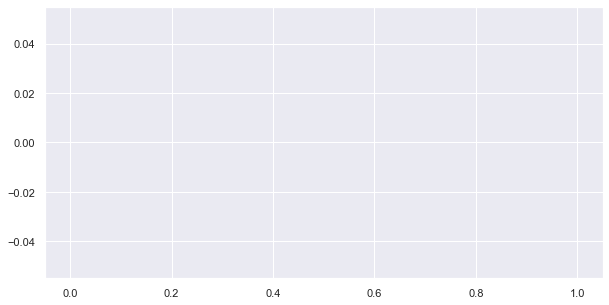

In [433]:
origin = np.array([[0,0],[0,0]])
plt.quiver(*origin, pca.components_)

### **12. Chaining Transfomers**

#### **Pipeline**

All intermidiate steps of the pipeline must be transformers(implement both *fit* and *transform*) and the final estimator needs to implement *fit* only.

##### Pipeline formation

*Method 1 : Using Pipeline*

In [434]:
from sklearn.pipeline import Pipeline

estimators = [
    ('simpleImputer', SimpleImputer()),
    ('standardScaler', StandardScaler())
]

pipe = Pipeline(steps = estimators)

*Method 2 : Using make_pipeline*

In [435]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(SimpleImputer(), StandardScaler())

##### Accessing individual steps in a pipeline

In [436]:
from sklearn.decomposition import PCA
estimators = [
    ('simpleImputer', SimpleImputer()),
    ('pca', PCA()),
    ('regressor', LinearRegression())
]

pipe = Pipeline(steps = estimators)

In [437]:
len(pipe.steps) # #steps in the pipeline

3

In [438]:
pipe.steps # names of steps

[('simpleImputer', SimpleImputer()),
 ('pca', PCA()),
 ('regressor', LinearRegression())]

$ Ways\ to\ access\ various\ steps $

In [439]:
pipe.named_steps.pca

PCA()

In [440]:
pipe.steps[1]

('pca', PCA())

In [441]:
pipe[1]

PCA()

In [442]:
pipe['pca']

PCA()

$ Accessing\ parameters\ of\ a\ step\ in\ pipeline $

Use the __ syntax

In [443]:
pipe.set_params(simpleImputer__missing_values = 2)

Pipeline(steps=[('simpleImputer', SimpleImputer(missing_values=2)),
                ('pca', PCA()), ('regressor', LinearRegression())])

##### GridSearch with Pipeline

In [444]:
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = dict(imputer = ['passthrough',
                            SimpleImputer(),
                            KNNImputer()],
                        clf = [SVC(), LogisticRegression()],
                        clf__C = [0.1, 10, 100])

grid_search = GridSearchCV(pipe, param_grid=param_grid)

#### **Caching Transformer**

Transforming the data is a computationally expensive step. So, instead of transforming now and then we should apply it once and reuse it.

In [445]:
import tempfile
tempDirPath = tempfile.TemporaryDirectory()

In [446]:
estimators = [
    ('simpleImputer', SimpleImputer()),
    ('pca', PCA()),
    ('regressor', LinearRegression())
]

pipe = Pipeline(steps = estimators, memory = tempDirPath)

#### **FeatureUnion**

Concatenates results of multiple transformer objects side-by-side to get a larger matrix.

### **13. Visualizing Pipelines**

In [447]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipe = Pipeline([('selector', ColumnTransformer([('select_first_4', 'passthrough', slice(0,4))])),
                    ('impute', SimpleImputer(strategy = 'median')),
                    ('std_scaler', StandardScaler())
                    ])

cat_pipe = ColumnTransformer([('label_binarizer', LabelBinarizer(), [4])])

full_pipe = FeatureUnion(transformer_list = [('num_pipe', num_pipe),
                                            ('cat_pipe', cat_pipe)])

In [448]:
from sklearn import set_config
set_config(display = 'diagram')
full_pipe

FeatureUnion(transformer_list=[('num_pipe',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select_first_4',
                                                                                  'passthrough',
                                                                                  slice(0, 4, None))])),
                                                ('impute',
                                                 SimpleImputer(strategy='median')),
                                                ('std_scaler',
                                                 StandardScaler())])),
                               ('cat_pipe',
                                ColumnTransformer(transformers=[('label_binarizer',
                                                                 LabelBinarizer(),
                                                                 [4])]))])

### **14. Handling Imbalaced Data**

Imbalaced datasets are those where one class is very less represented than the other class.

*Handled using two methods :*
* Undersampling ~ 
* Oversampling ~

<AxesSubplot:>

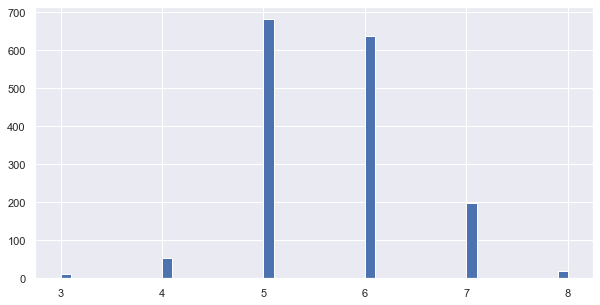

In [449]:
wine_data = pd.read_csv('winequality-red.csv', sep=';')

wine_data['quality'].hist(bins = 50)


In [450]:
wine_data.shape

(1599, 12)

#### **Undersampling**

In [451]:
from imblearn.under_sampling import RandomUnderSampler

In [452]:
# Class count
class_c3,class_c4,class_c5,class_c6,class_c7,class_c8 = wine_data['quality'].value_counts()

# Separate class

class_3 = wine_data[wine_data['quality'] == 3]
class_4 = wine_data[wine_data['quality'] == 4]
class_5 = wine_data[wine_data['quality'] == 5]
class_6 = wine_data[wine_data['quality'] == 6]
class_7 = wine_data[wine_data['quality'] == 7]
class_8 = wine_data[wine_data['quality'] == 8]

# print the shape of the class

print('class 3 :', class_3.shape)
print('class 4 :', class_4.shape)
print('class 5 :', class_5.shape)
print('class 6 :', class_6.shape)
print('class 7 :', class_7.shape)
print('class 8 :', class_8.shape)


class 3 : (10, 12)
class 4 : (53, 12)
class 5 : (681, 12)
class 6 : (638, 12)
class 7 : (199, 12)
class 8 : (18, 12)


In [453]:
from collections import Counter

X = wine_data.drop(['quality'], axis = 1)
y = wine_data['quality']

undersample = RandomUnderSampler(random_state=0)
X_runs, y_runs = undersample.fit_resample(X,y)

print('Original dataset shape :', Counter(y))
print('Resample dataset shape :', Counter(y_runs))

Original dataset shape : Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resample dataset shape : Counter({3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10})


#### **Oversampling**

In [454]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X,y)

print('Original dataset shape :', Counter(y))
print('Resample dataset shape :', Counter(y_ros))

Original dataset shape : Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resample dataset shape : Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})


In [455]:
print(X_ros.shape[0] - X.shape[0], 'New random points generated with ROS')

2487 New random points generated with ROS


*Oversampling using SMOTE*

SMOTE (Synthetic Minority Oversampling Technique) is a popular technique for oversampling. It is available unde4r **imblearn** library.

There are 3 types of SMOTE :
* Bordering SMOTE
* Border-line SMOTE SVM
* Adaptive Synthetic Sampling (ADASYN)

In [456]:
from imblearn.over_sampling import SMOTE

In [457]:
oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X,y)
counter = Counter(y_sm)
counter

Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})